In [37]:
import numpy as np
import pandas as pd
import yfinance as yf
from tqdm import tqdm
from collections import defaultdict
import urllib.error
from matplotlib import pyplot as plt
import seaborn as sns

In [17]:
etf_tickers = pd.read_csv(
    './data/etf_tickers.csv', 
    sep='\t', 
    usecols=['Trading Symbol', 'ETF Security Description']
)
etf_tickers

,Trading Symbol,ETF Security Description
0,AAA,INVESTMENT MANAGERS SER TR II AXS FI
1,AADR,ADVISORSHARES DORSEY WRIGHT ADR ETF
2,AAPB,GRANITESHARES ETF TR 1.75X LONG AAP
3,AAPD,DIREXION SHS ETF TR DAILY AAPL BEAR
4,AAPU,DIREXION SHS ETF TR DAILY AAPL BULL
...,...,...
3133,ZROZ,PIMCO ETF TR 25+ YR ZERO CPN US TREA
3134,ZSB,USCF ETF TR USCF SUSTAINABLE BATTERY
3135,ZSL,PROSHARES TR II ULTRASHORT SILVER NE
3136,ZSPY,ASYMMETRIC ETFS TR SMART ALPHA S&P 5


In [18]:
def download_ticker_metadata(tickers:list) -> dict:
    """ Download meta data information for tickers.
        Args:
            tickers (list): list of tickers
        Returns:
            ticker_metadata (dict): dict wich contains ticker metadata
            errors (list): list of tickers and error types
    """
    ticker_metadata = defaultdict(list)
    errors = []

    for ticker in tqdm(tickers):
        try:
            ticker_info = yf.Ticker(ticker=ticker).get_info()
            ticker_volume = ticker_info['volume']
            ticker_category = ticker_info['category']
            ticker_metadata['ticker'].append(ticker)
            ticker_metadata['volume'].append(ticker_volume)
            ticker_metadata['category'].append(ticker_category)
        except KeyError:
            errors.append(('KeyError', ticker))
        except urllib.error.HTTPError:
            errors.append(('HTTPError', ticker))
        except:
            errors.append(('UnkownError', ticker))

    return ticker_metadata, errors

In [19]:
DOWNLOAD_METADATA = False

if DOWNLOAD_METADATA:
    ticker_metadata_df = download_ticker_metadata(tickers=etf_tickers['Trading Symbol'])
    ticker_metadata_df.to_csv('./data/etf_tickers_metadata.csv', index=False)

ticker_metadata_df = pd.read_csv("./data/etf_tickers_metadata.csv")
ticker_metadata_df.sort_values(by="volume", ascending=False)

,ticker,volume,category
2130,SQQQ,86619885,Trading--Inverse Equity
183,BOIL,84116396,Trading--Leveraged Commodities
2254,TQQQ,83565135,Trading--Leveraged Equity
2067,SOXL,61130258,Trading--Leveraged Equity
2069,SOXS,61025073,Trading--Inverse Equity
...,...,...,...
2175,SYII,0,Large Blend
1055,HYGI,0,Inflation-Protected Bond
1295,JIB,0,Intermediate-Term Bond
2059,SNPD,0,Large Value


In [20]:
print(f"Mean Volume: {ticker_metadata_df.loc[:, 'volume'].mean()}")
print(f"Median Volume: {ticker_metadata_df.loc[:, 'volume'].median()}")
print(f"Q75 Volume: {ticker_metadata_df.loc[:, 'volume'].quantile(0.75)}")

Mean Volume: 642129.3061538462
Median Volume: 9894.0
Q75 Volume: 85775.75


In [21]:
ticker_metadata_df_filtered = ticker_metadata_df[ticker_metadata_df['volume'] >= 1e5]
ticker_metadata_df_filtered = ticker_metadata_df_filtered.sort_values(by='volume', ascending=False)
ticker_metadata_df_filtered.reset_index(inplace=True, drop=True)
ticker_metadata_df_filtered

,ticker,volume,category
0,SQQQ,86619885,Trading--Inverse Equity
1,BOIL,84116396,Trading--Leveraged Commodities
2,TQQQ,83565135,Trading--Leveraged Equity
3,SOXL,61130258,Trading--Leveraged Equity
4,SOXS,61025073,Trading--Inverse Equity
...,...,...,...
608,FBCG,103497,Large Growth
609,FTLS,101761,Long-Short Equity
610,MLPA,100452,Energy Limited Partnership
611,AOK,100331,Allocation--30% to 50% Equity


In [22]:
ticker_metadata_df_filtered['category'].value_counts()

category
Large Blend                      40
Trading--Inverse Equity          38
Trading--Leveraged Equity        34
Large Value                      33
Foreign Large Blend              27
                                 ..
Multisector Bond                  1
Muni California Long              1
World Allocation                  1
Long-Short Equity                 1
Allocation--30% to 50% Equity     1
Name: count, Length: 76, dtype: int64

In [23]:
ticker_string = " ".join(ticker_metadata_df_filtered.loc[:,"ticker"].to_list())
ticker_string

'SQQQ BOIL TQQQ SOXL SOXS SPY UVXY PSQ QQQ XLF HYG FXI LABU KWEB EWZ IWM EFA XLE GDX EEM SH SPXS SPXU LQD TMF IEF DPST KRE TLT XLU TSLL VWO TNA XLP ARKK IQLT SPXL VEA QID NVDS XLI BIL EZU IEMG VIXY JDST IEFA VCIT IGSB DUST XLV XRT UVIX EMB XLC XLK TZA EWJ BKLN USHY USFR GOVT PGX JNK AGG SMH XBI UPRO XLB SCHH SDOW LABD EWU UUP SDS UCO MBB XLRE TIP IJR IYR EWG SPTI MCHI GDXJ VGSH SHY YANG XLY URA SCHD KBE RSP EWQ SPIB NUGT SHV BND VNQ UDOW XOP JPST SSO QLD VCSH VOO SGOV SPTS DIA DFAC EWY YINN VGK PFF XME EWH SPDN IVV SPYD VXUS VMBS SPTL FEZ SPLG SOXX MUB EWT TFLO ICLN VTI HIBS XHB SPAB TBT SPLV VYM SCHF VEU SPDW PDBC SPYV DFEM INDA IWF TECL ASHR RWM ITB TWM SCZ SJNK DFIC EFG FTSM VTV SPSB EWC SCO TECS KOLD VTEB SILJ IGE IGIB IJJ USMV IAI BSV FTGC DFGR VNM FAZ FLOT VTWO USIG EWW SPYG EMLC IYJ COWZ FDL EWA BOTZ IJK DUHP SRLN SPLB IWN IXUS IBB VCLT MINT JETS TSLQ SCHX ANGL AMLP XSOE FPE DGRO VTIP WEBL FLJP EFV SCHP SCHC ERX IEI HYLB DISV SPEM CIBR FV SPMB JNUG SVIX IVW DRIP IJH PCY DBMF IWD

In [29]:
DOWNLOAD_HIST_PRICES = False

if DOWNLOAD_HIST_PRICES:
    ticker_string = " ".join(ticker_metadata_df_filtered.loc[:,"ticker"].to_list())
    ticker_prices = yf.download(
        tickers=ticker_string,
        start="2014-01-01",
        end="2022-12-31"
        )["Adj Close"]
    ticker_prices.dropna(axis=1, inplace=True)
    ticker_prices.to_csv("./data/etf_hist_prices.csv")
    
ticker_prices = pd.read_csv(
    "./data/etf_hist_prices.csv", 
    parse_dates=["Date"],
    index_col="Date")
ticker_prices

,AAXJ,ACWX,AGG,AGQ,AGZ,AMLP,ANGL,AOK,AOR,ASHR,...,XLV,XLY,XME,XOP,XRT,YANG,YINN,YYY,ZROZ,ZSL
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,49.333683,36.135860,85.134140,66.320000,94.718872,40.978897,16.375187,25.891409,30.742685,17.339821,...,47.490868,59.389507,36.674202,231.718124,38.211926,554.267700,509.904602,11.425961,67.096748,170.839996
2014-01-03,49.054714,36.127968,85.166084,67.720001,94.513702,40.909138,16.381254,25.940166,30.774855,17.261005,...,47.602837,59.228798,36.330242,229.611862,38.281853,576.003723,489.126526,11.445757,67.064507,167.039993
2014-01-06,48.725037,36.001640,85.278023,67.720001,94.564980,40.839363,16.344831,25.907660,30.710495,16.831091,...,47.404713,58.862759,36.055103,228.368790,37.914761,604.984924,464.979004,11.455651,67.467438,167.199997
2014-01-07,48.953274,36.151661,85.317963,65.599998,94.624817,40.862602,16.448046,25.988928,30.895542,16.866915,...,47.904350,59.219860,35.788521,230.475067,37.975948,604.984924,465.540649,11.539776,67.805893,172.580002
2014-01-08,48.961727,36.151661,85.062187,63.599998,94.488045,40.560276,16.448046,25.956423,30.815084,16.874083,...,48.326458,59.059155,35.530548,229.439194,37.796768,584.698059,479.579926,11.490292,67.435196,177.960007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,64.510002,45.590000,97.006676,31.469999,105.987823,36.260628,26.683306,33.650570,47.421120,27.450001,...,135.571228,129.036224,50.616562,136.504166,60.185707,12.717697,44.288082,11.930000,89.943977,19.650000
2022-12-27,65.760002,45.880001,96.303658,32.250000,105.661072,36.135956,26.351957,33.501579,47.331474,28.219999,...,135.222580,126.942627,51.025162,137.396866,59.498043,10.931891,50.579399,11.830000,87.411591,19.190001
2022-12-28,64.419998,45.320000,96.135315,30.770000,105.700668,35.598900,26.073992,33.362526,46.913139,27.660000,...,134.345993,125.875885,48.982162,131.296722,58.621021,11.928391,45.552315,11.570000,86.426231,20.100000


In [ ]:
{'Bank Loan',
 ,
 'Commodities Broad Basket',
 '',
 'Consumer Cyclical',
 'Consumer Defensive',
 'Convertibles',
 ,
 ,
 'Energy Limited Partnership',
 ,
 ,
 ,
 ,
 ',
 ,
 ,
 'Intermediate Government',
 ,
 ,
 'Long Government',
 'Long-Short Equity',
 'Managed Futures',
 ,
 ,
 'Preferred Stock',
 'Short Government',
 'Single Currency',

In [77]:
categories = set(ticker_metadata_df.loc[:,'category'].unique())
trading_cat = set([cat for cat in categories if "Trading--" in cat])
allocation_cat = set([cat for cat in categories if "Allocation" in cat])
blend_cat = set([cat for cat in categories if "Blend" in cat])
bond_cat = set([cat for cat in categories if "Bond" in cat])
muni_cat = set([cat for cat in categories if "Muni" in cat])
growth_cat = set([cat for cat in categories if "Growth" in cat])
value_cat = set([cat for cat in categories if "Value" in cat])

sectors = set(['Communications', 'Equity Energy', 'Financial', 'Health', 'Global Real Estate', 'Industrials',
           'Infrastructure', 'Natural Resources', 'Real Estate', 'Technology', 'Utilities', 'Equity Precious Metals',
           'Miscellaneous Sector'])
regions = set(['China Region', 'Diversified Emerging Mkts', 'Diversified Pacific/Asia', 'Europe Stock', 'India Equity',
               'Japan Stock', 'Latin America Stock', 'Miscellaneous Region', 'Pacific/Asia ex-Japan Stk'])


In [78]:
categories - trading_cat - allocation_cat - blend_cat - bond_cat - muni_cat - growth_cat - value_cat - sectors - regions

{'Bank Loan',
 'Commodities Broad Basket',
 'Consumer Cyclical',
 'Consumer Defensive',
 'Convertibles',
 'Energy Limited Partnership',
 'Intermediate Government',
 'Long Government',
 'Long-Short Equity',
 'Managed Futures',
 'Preferred Stock',
 'Short Government',
 'Single Currency'}

<Axes: ylabel='category'>

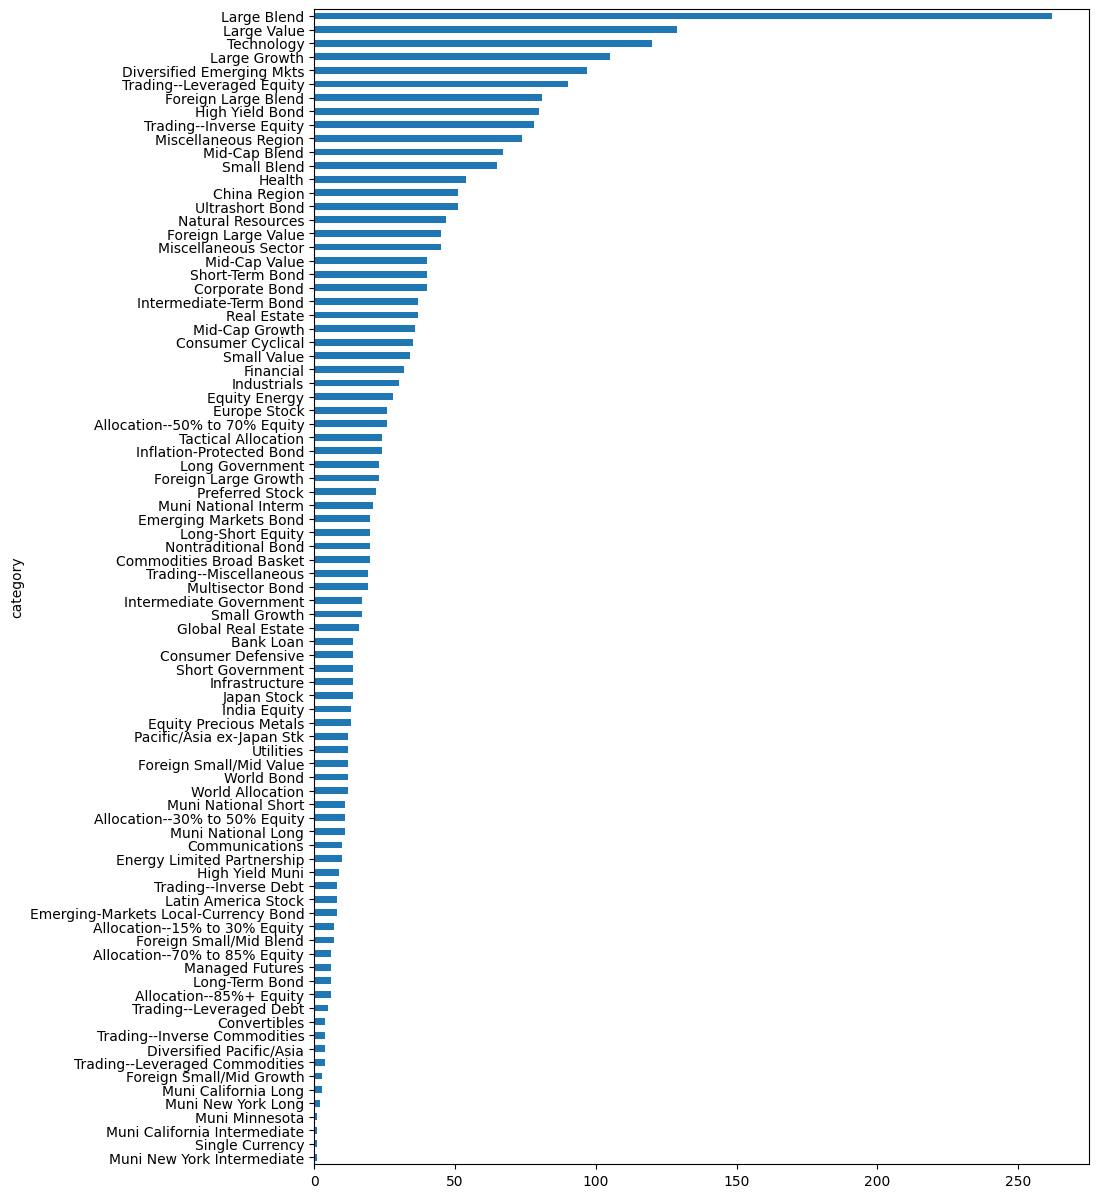

In [57]:
_, ax0 = plt.subplots(1, 1, figsize=(10, 15))

vc = ticker_metadata_df.loc[:,"category"].value_counts()
vc = vc.sort_values()
vc.plot(kind='barh')

In [40]:
data = ticker_metadata_df.loc[:,"category"].value_counts().values
idx = ticker_metadata_df.loc[:,"category"].value_counts().index